In [1]:
from finta import TA
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf
from alpha_vantage.timeseries import TimeSeries
import datetime as dt
import copy
import matplotlib.pyplot as plt
import time


In [2]:
tickers=["DIVISLAB.NS","BAJFINANCE.NS","JSWSTEEL.NS"]


In [3]:
ohlc_intraday_5M={}
ohlc_intraday_2M={}
ohlc_intraday_1D={}
ohlc_intraday_1M={}

In [4]:
for ticker in tickers:
    ohlc_intraday_5M[ticker]=yf.download(ticker,dt.datetime.today()-dt.timedelta(7),dt.datetime.today(),interval="5m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
for ticker in tickers:
    ohlc_intraday_1D[ticker]=yf.download(ticker,dt.datetime.today()-dt.timedelta(6),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
for ticker in tickers:
    ohlc_intraday_1M[ticker]=yf.download(ticker,dt.datetime.today()-dt.timedelta(7),dt.datetime.today(),interval="1m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
ohlc_intraday_1D["BAJFINANCE.NS"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-07,5800.000000,5843.850098,5682.450195,5729.750000,5729.750000,2835805
2021-06-08,5751.000000,5817.000000,5720.149902,5755.399902,5755.399902,1789007
2021-06-09,5795.000000,5795.000000,5627.299805,5674.500000,5674.500000,1538112
2021-06-10,5715.000000,6115.000000,5677.000000,6086.399902,6086.399902,5296120
2021-06-11,6105.350098,6230.000000,6045.200195,6120.000000,6120.000000,3702721


In [8]:
ohlc_dict_1D=copy.deepcopy(ohlc_intraday_1D)
ohlc_dict_1M=copy.deepcopy(ohlc_intraday_1M)
ohlc_dict_2M=copy.deepcopy(ohlc_intraday_2M)

ohlc_dict_5M=copy.deepcopy(ohlc_intraday_5M)

In [9]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    df["MA_Fast"]=df["close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    df.drop(["MA_Fast","MA_Slow"],axis=1)
    return df


def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = len(df)/(252*74)
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252*74)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

def win_pct(DF):
    df=DF.copy()
    j=0
    for i in range(len(df)):
        if df["profit"][i]>0:
            j+=1

    win_percent=j/len(df)*100

    return win_percent
            


In [10]:
tickers_signal = {}
ticker_ret = {}

In [11]:
for ticker in tickers:
    ohlc_dict_1M[ticker]=ohlc_dict_1M[ticker].iloc[:,[0,1,2,4,5]]
    ohlc_dict_1M[ticker].columns=["open","high","low","close","volume"]

    ohlc_dict_5M[ticker]=ohlc_dict_5M[ticker].iloc[:,[0,1,2,4,5]]
    ohlc_dict_5M[ticker].columns=["open","high","low","close","volume"]

    ohlc_dict_1D[ticker]=ohlc_dict_1D[ticker].iloc[:,[0,1,2,4,5]]
    ohlc_dict_1D[ticker].columns=["open","high","low","close","volume"]

    ohlc_dict_1M[ticker]["VWAP"]=TA.VWAP(ohlc_dict_1M[ticker])
    ohlc_dict_1M[ticker]["volume MA"]= ohlc_dict_1M[ticker]["volume"].rolling(20).mean()



    

In [12]:
for ticker in tickers:
    try:
        print("calculating for ",ticker)
        price=[]

        for k in range(len(ohlc_dict_1D[ticker])):
            for i in range(k*375,(k+1)*375):
                
                
                if i!=1874:

                
                    if i<375:
                        price.append(0)

                    else:
                        price.append(ohlc_dict_1D[ticker]["high"][k-1])

 
   

                

        ohlc_dict_1M[ticker]["previous day high"]=np.array(price)

    except:
        print("problem with data")





calculating for  DIVISLAB.NS
calculating for  BAJFINANCE.NS
calculating for  JSWSTEEL.NS


In [13]:
for ticker in tickers:
    print("getting data for", ticker)
    try:
        price=[]

        for k in range(len(ohlc_dict_1D[ticker])):
            for i in range(k*375,(k+1)*375):
            
                if i!=1874:
                    if i<375:
                        price.append(0)

                    else:
                        price.append(ohlc_dict_1D[ticker]["low"][k-1])

        ohlc_dict_1M[ticker]["previous day low"]=np.array(price)

    except:
        print("problem with data")


getting data for DIVISLAB.NS
getting data for BAJFINANCE.NS
getting data for JSWSTEEL.NS


In [14]:
for ticker in tickers:
    print("getting data for ", ticker)
    try:
        prise=[]

        for k in range(len(ohlc_dict_1D[ticker])):
            for i in range(k*375,(k+1)*375):
                
                if i!=1874:
                    if i<375:
                        prise.append(0)

                    elif i>k*375 and i<k*375+5:
                        prise.append(0)

                    else:
                        prise.append(ohlc_dict_5M[ticker]["high"][k*75:k*75+3].max())

        ohlc_dict_1M[ticker]["intraday high"]=np.array(prise)

    except:
        print("problem with data")

getting data for  DIVISLAB.NS
getting data for  BAJFINANCE.NS
getting data for  JSWSTEEL.NS


In [15]:
for ticker in tickers:
    print("getting data for ", ticker)
    try:
        prise=[]

        for k in range(len(ohlc_dict_1D[ticker])):
            for i in range(k*375,(k+1)*375):
                
                if i!=1874:
                    if i<375:
                        prise.append(0)

                    elif i>k*375 and i<k*375+5:
                        prise.append(0)

                    else:
                        prise.append(ohlc_dict_5M[ticker]["low"][k*75:k*75+3].min())

        ohlc_dict_1M[ticker]["intraday low"]=np.array(prise)

    except:
        print("problem with data")

getting data for  DIVISLAB.NS
getting data for  BAJFINANCE.NS
getting data for  JSWSTEEL.NS


In [16]:
ohlc_dict_1M["BAJFINANCE.NS"].to_csv("a2.csv")

In [17]:
ticker_signal={}
ticker_ret={}
ohlc_database={}
price_in=[]
price_out=[]
order=[]
stock=[]
ohlc_dict={}


In [18]:
for ticker in tickers:


    ticker_signal[ticker]=[]
    ticker_ret[ticker]=[]
    ohlc_database[ticker]=pd.DataFrame()
    ohlc_dict[ticker]=pd.DataFrame()

    ohlc_dict_1M[ticker].rename(columns={"open":"Open","high":"High","low":"Low","close":"Close","volume":"Volume"},inplace=True)
    ohlc_dict[ticker]=copy.deepcopy(ohlc_dict_1M[ticker])

In [19]:
try:

    for ticker in tickers:
        signal=""
        for i in range(len(ohlc_dict[ticker])):
            
            
            
            
            
            
            if signal=="":
                if ohlc_dict[ticker]["Close"][i]>ohlc_dict[ticker]["VWAP"][i] and ohlc_dict[ticker]["Close"][i]>ohlc_dict[ticker]["previous day high"][i] and ohlc_dict[ticker]["Volume"][i]>=1.5*ohlc_dict[ticker]["volume MA"][i]:

                    signal="buy"
                    price=ohlc_dict[ticker]["Close"][i]
                    price_in.append(ohlc_dict[ticker]["Close"][i])
                    
                    order.append("long")
                    stock.append(ticker)

                    
                



                elif ohlc_dict[ticker]["Close"][i]<ohlc_dict[ticker]["VWAP"][i] and ohlc_dict[ticker]["Close"][i]<ohlc_dict[ticker]["previous day low"][i] and ohlc_dict[ticker]["Volume"][i]>=1.5*ohlc_dict[ticker]["volume MA"][i]:
                    signal="sell"
                    price=ohlc_dict[ticker]["Close"][i]
                    
                    price_in.append(ohlc_dict[ticker]["Close"][i])
                    
                    order.append("short")
                    stock.append(ticker)                
                ticker_ret[ticker].append(0)

            elif signal=="buy":
                if ohlc_dict[ticker]["Close"][i]<ohlc_dict[ticker]["intraday low"][i]  or ohlc_dict[ticker]["Close"][i]>=price+.02*price or ohlc_dict[ticker]["Close"][i]<=price-.01*price:

                    signal=""
                    price_out.append(ohlc_dict[ticker]["Close"][i])
                    ticker_ret[ticker].append((ohlc_dict[ticker]["Close"][i]/ohlc_dict[ticker]["Close"][i-1])-1)

                
                
                else:
                    ticker_ret[ticker].append((ohlc_dict[ticker]["Close"][i]/ohlc_dict[ticker]["Close"][i-1])-1)
            
            
            
            elif signal=="sell":
                if ohlc_dict_1M[ticker]["Close"][i]>ohlc_dict_1M[ticker]["intraday high"][i]  or ohlc_dict[ticker]["Close"][i]>=price+.01*price or ohlc_dict[ticker]["Close"][i]<=price-.02*price:
                    price_out.append(ohlc_dict[ticker]["Close"][i])

                    signal=""
                    ticker_ret[ticker].append((ohlc_dict[ticker]["Close"][i-1]/ohlc_dict[ticker]["Close"][i])-1)

            
                
                else:
                    ticker_ret[ticker].append((ohlc_dict[ticker]["Close"][i-1]/ohlc_dict[ticker]["Close"][i])-1)
        if len(price_in)!=len(price_out):
            price_out.append(ohlc_dict[ticker]["Close"][-1])
        ohlc_dict[ticker]["ret"] = np.array(ticker_ret[ticker]) 

except:
    print("cant find data")






In [20]:
ohlcv_database=pd.DataFrame()

ohlcv_database["price_in"]=np.array(price_in)
ohlcv_database["price_out"]=np.array(price_out)
ohlcv_database["order"]=np.array(order)
ohlcv_database["stock"]=np.array(stock)

In [21]:
profit=[]
for i in range(len(ohlcv_database)):
    if ohlcv_database["order"][i]=="long":
        profit.append(((ohlcv_database["price_out"][i]-ohlcv_database["price_in"][i])/ohlcv_database["price_in"][i])*100)

    elif ohlcv_database["order"][i]=="short":
        profit.append(((ohlcv_database["price_in"][i]-ohlcv_database["price_out"][i])/ohlcv_database["price_out"][i])*100)

ohlcv_database["profit"]=np.array(profit)

In [22]:
ohlcv_database.to_csv("database.csv")

In [23]:
strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_dict[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)
CAGR(strategy_df)



0.03276251087090176

<AxesSubplot:xlabel='Datetime'>

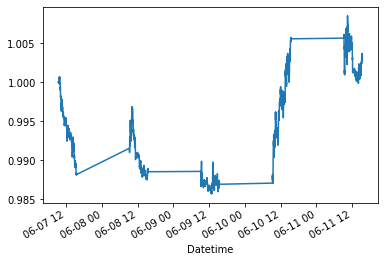

In [24]:
(1+strategy_df["ret"]).cumprod().plot()

In [25]:
cagr = {}
sharpe_ratios = {}
max_drawdown = {}
win_pcts={}
for ticker in tickers:
    win=[]
    print("calculating KPIs for ",ticker)      
    cagr[ticker] =  CAGR(ohlc_dict[ticker])
    for i in range(len(ohlcv_database)):
        if ohlcv_database["stock"][i]==ticker:
            
            win.append(ohlcv_database["profit"][i])
    win_df=pd.DataFrame()
    win_df["profit"]=np.array(win)
    win_pcts[ticker]=win_pct(win_df)           

    sharpe_ratios[ticker] =  sharpe(ohlc_dict[ticker],0.025)
    max_drawdown[ticker] =  max_dd(ohlc_dict[ticker])

KPI_df = pd.DataFrame([cagr,sharpe_ratios,max_drawdown,win_pcts],index=["Return","Sharpe Ratio","Max Drawdown","win_pct"])      
KPI_DF=KPI_df.T


calculating KPIs for  DIVISLAB.NS
calculating KPIs for  BAJFINANCE.NS
calculating KPIs for  JSWSTEEL.NS


In [26]:
KPI_DF.to_csv("a1.csv")